# >Problem 3<

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv('CH03TA10.txt', sep = '\s+', header = None, names = ['Y','X'])

In [3]:
lowess = sm.nonparametric.lowess
z = lowess(df['Y'], df['X'])

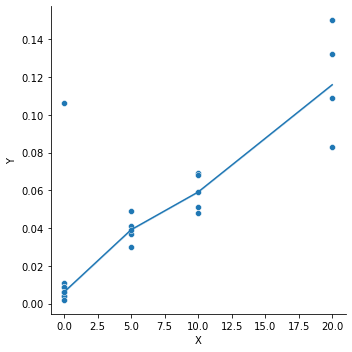

In [4]:
sns.relplot(x = 'X', y = 'Y', data= df)
sns.lineplot(x=z[:,0],y=z[:,1])
plt.show()

In [5]:
df1=df.drop(23)
df1.tail()

,Y,X
18,0.006,0
19,0.059,10
20,0.051,10
21,0.002,0
22,0.049,5


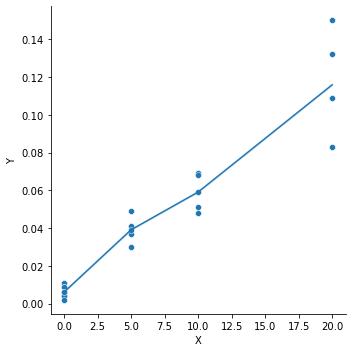

In [6]:
# xoa mat cai outliner
sns.relplot(x = 'X', y = 'Y', data= df1)
sns.lineplot(x=z[:,0],y=z[:,1])
plt.show()

# a linear regression function was fitted next, based on the remaining 23 cases.

In [7]:
model = smf.ols('Y ~ X', data=df1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     229.0
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           9.08e-13
Time:                        11:15:42   Log-Likelihood:                 69.066
No. Observations:                  23   AIC:                            -134.1
Df Residuals:                      21   BIC:                            -131.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0070      0.004      1.954      0.064      -0.000       0.015
X              0.0055      0.000     15.133      0.000       0.005       0.006
==============================================================================
Omnibus:                        6.365   Durbin-Watson:                   1.798
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.757
Skew:                          -0.186   Prob(JB):                       0.0341
Kurtosis:                       5.629   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## check if residuals follow normal distribution, and constant variance

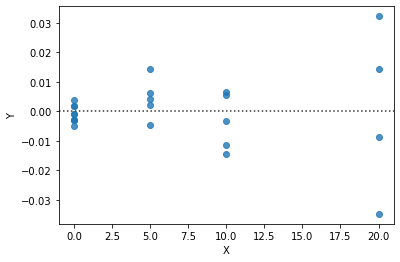

In [8]:
sns.residplot( x= 'X',y='Y', data=df1);

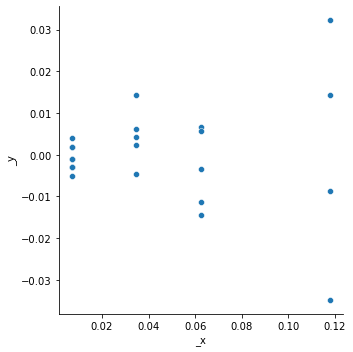

In [9]:
sns.relplot(x= results.fittedvalues,y = results.resid, data=df1);

In [10]:
import statsmodels.stats as stats
stats.diagnostic.het_breuschpagan(results.resid, results.model.exog, robust =False)

(23.326014598146557,
 1.3673802023848293e-06,
 16.377156568214044,
 0.000580871180101769)

p = 1.3 >0.05, hence, the errors from this model have non constant varience

## Transformation on Y using Box-cox procedure

In [11]:
import scipy.stats as stats

In [12]:
sse_arr = []
lam_arr = np.arange(-1,2,0.05)

for lam in lam_arr:
    K2 = stats.gmean(df['Y'])
    if lam == 0:
        df1['W'] = K2*np.log(df['Y']) #tao cot moi ten W
    else:
        K1 = 1 / (lam*(K2**(lam-1)))
        df1['W']= K1*(df['Y']**lam-1)
    
    # Regress W to X
    model_lam = smf.ols('W~X', data = df1).fit()
    sse_lam = sum((model_lam.resid)**2)
    print(lam, sse_lam)
    sse_arr.append(sse_lam)

-1.0 0.0828914382345474
-0.95 0.07050106686035953
-0.8999999999999999 0.0601392852541585
-0.8499999999999999 0.051454223022817394
-0.7999999999999998 0.04415738774684851
-0.7499999999999998 0.03801193332545054
-0.6999999999999997 0.032823146492276314
-0.6499999999999997 0.02843072529079181
-0.5999999999999996 0.024702506303398885
-0.5499999999999996 0.02152936409602027
-0.49999999999999956 0.018821059915201714
-0.4499999999999995 0.016502859753959914
-0.39999999999999947 0.01451277656284435
-0.3499999999999994 0.012799319286899787
-0.2999999999999994 0.011319653889229835
-0.24999999999999933 0.010038099644827663
-0.1999999999999993 0.008924898609769928
-0.14999999999999925 0.007955207976972991
-0.0999999999999992 0.007108274571201626
-0.049999999999999156 0.006366758455150789
8.881784197001252e-16 0.005729190437905858
0.05000000000000093 0.005144460809436738
0.10000000000000098 0.004641564629850702
0.15000000000000102 0.004199184485786383
0.20000000000000107 0.0038105040772319645
0.250

In [13]:
lam_opt = 0.65

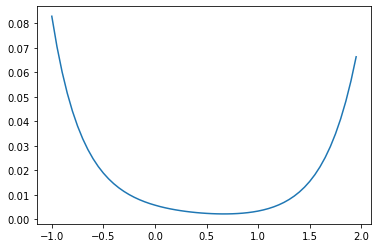

In [14]:
sns.lineplot(x = lam_arr, y = sse_arr)
plt.show()
# thay dc khoang nho nhat nam o tuf 0.5 den 1 => 0.65

## square root trans for Y

In [15]:
df1['Y_trans']= np.sqrt(df['Y'])
df1.head()

,Y,X,W,Y_trans
0,0.150,20,-16.467289,0.387298
1,0.004,0,-16.884647,0.063246
2,0.069,10,-16.793115,0.262679
3,0.030,5,-16.866894,0.173205
4,0.011,0,-16.882443,0.104881


In [16]:
model_Y = smf.ols('Y_trans ~ X', data = df1).fit()
model_Y.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y_trans   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     188.8
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           5.77e-12
Time:                        11:15:43   Log-Likelihood:                 46.579
No. Observations:                  23   AIC:                            -89.16
Df Residuals:                      21   BIC:                            -86.89
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0948      0.010      9.905      0.000       0.075       0.115
X              0.0134      0.001     13.740      0.000       0.011       0.015
==============================================================================
Omnibus:                        0.452   Durbin-Watson:                   2.471
Prob(Omnibus):                  0.798   Jarque-Bera (JB):                0.491
Skew:                          -0.286   Prob(JB):                        0.782
Kurtosis:                       2.570   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

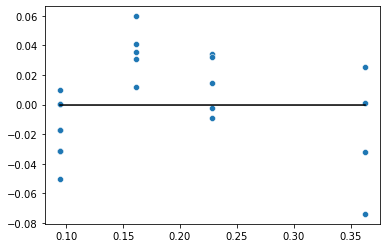

In [17]:
sns.scatterplot(x = model_Y.fittedvalues, y =model_Y.resid)
sns.lineplot(x =model_Y.fittedvalues, y = 0, color = 'black' );

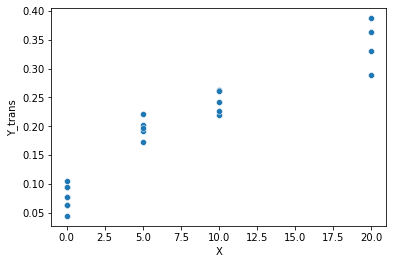

In [18]:
sns.scatterplot(x = df1['X'], y = df1['Y_trans']);

## perform X transformation

In [19]:
df1['X_trans'] = np.sqrt(df['X'])
df1.head()

,Y,X,W,Y_trans,X_trans
0,0.150,20,-16.467289,0.387298,4.472136
1,0.004,0,-16.884647,0.063246,0.000000
2,0.069,10,-16.793115,0.262679,3.162278
3,0.030,5,-16.866894,0.173205,2.236068
4,0.011,0,-16.882443,0.104881,0.000000


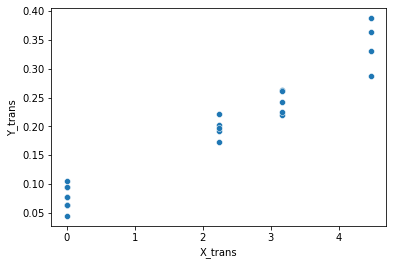

In [20]:
sns.scatterplot(x = df1['X_trans'], y = df1['Y_trans']);

In [23]:
model_XY = smf.ols('Y_trans ~ X_trans', data = df1).fit()
model_XY.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Y_trans   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     360.9
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.05e-14
Time:                        11:20:48   Log-Likelihood:                 53.469
No. Observations:                  23   AIC:                            -102.9
Df Residuals:                      21   BIC:                            -100.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0730      0.008      9.323      0.000       0.057       0.089
X_trans        0.0573      0.003     18.998      0.000       0.051       0.064
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   2.046
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.532
Skew:                           0.367   Prob(JB):                        0.766
Kurtosis:                       2.866   Cond. No.                         4.29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# BP test
import statsmodels.stats as stats
stats.diagnostic.het_breuschpagan(model_XY.resid, model_XY.model.exog, robust =False)

(3.852910591206875,
 0.04965974331926765,
 4.5949709195035355,
 0.04393029617380015)

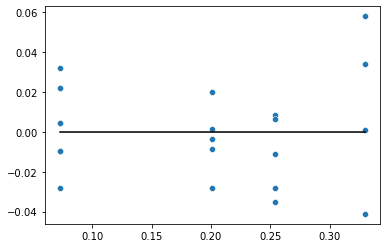

In [25]:
sns.scatterplot(x = model_XY.fittedvalues, y =model_XY.resid)
sns.lineplot(x =model_XY.fittedvalues, y = 0, color = 'black' );

# >Problem 4<